In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 폰트
plt.rc('font', family = 'AppleGothic')

# 그래프를 이미지로 저장할 때
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'Box_plot'

In [6]:
def FileSave():
    global cnt
    cnt +=1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi = 400)
    print(savefile + '파일이 저장되었습니다.')

# rectangular & Notched box plot

     Unnamed: 0  total_bill   tip     sex smoker   day    time  size
0             0       16.99  1.01  Female     No   Sun  Dinner     2
1             1       10.34  1.66    Male     No   Sun  Dinner     3
2             2       21.01  3.50    Male     No   Sun  Dinner     3
3             3       23.68  3.31    Male     No   Sun  Dinner     2
4             4       24.59  3.61  Female     No   Sun  Dinner     4
..          ...         ...   ...     ...    ...   ...     ...   ...
239         239       29.03  5.92    Male     No   Sat  Dinner     3
240         240       27.18  2.00  Female    Yes   Sat  Dinner     2
241         241       22.67  2.00    Male    Yes   Sat  Dinner     2
242         242       17.82  1.75    Male     No   Sat  Dinner     2
243         243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 8 columns]
chartdata
[array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.2

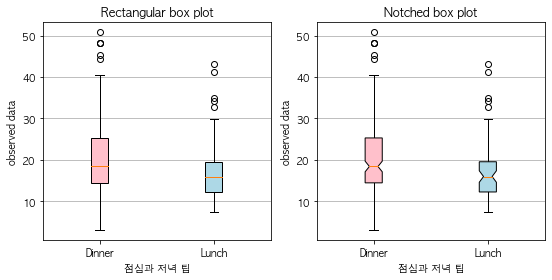

In [7]:
# data load
data3 = pd.read_csv('../data/tips.csv')
print(data3)
DINNER, LUNCH = 'Dinner', 'Lunch'

frame01 = data3.loc[data3['time'] == DINNER, 'total_bill']
frame01.index.name = DINNER

frame02 = data3.loc[data3['time'] == LUNCH, 'total_bill']
frame02.index.name = LUNCH

chartdata = [np.array(frame01), np.array(frame02)]
print('chartdata')
print(chartdata)



# x 축을 위한 레이블
xtick_label = [DINNER, LUNCH] 

# 행의 개수는 1, 열의 개수는 2 - 축은 ax1, ax2
fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot - notch=Fasle
bplot1 = ax1.boxplot(chartdata,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=xtick_label)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(chartdata,
                     notch=True,  # notch shape :: 홈이 패인 plot
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=xtick_label)  # will be used to label x-ticks
ax2.set_title('Notched box plot')


# fill with colors
colors = ['pink', 'lightblue']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors): # dinner, lunch에 대한 Plot
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('점심과 저녁 팁')
    ax.set_ylabel('observed data')
    
    
# plt.show()
FileSave()

# violin & box plot

     Unnamed: 0  total_bill   tip     sex smoker   day    time  size
0             0       16.99  1.01  Female     No   Sun  Dinner     2
1             1       10.34  1.66    Male     No   Sun  Dinner     3
2             2       21.01  3.50    Male     No   Sun  Dinner     3
3             3       23.68  3.31    Male     No   Sun  Dinner     2
4             4       24.59  3.61  Female     No   Sun  Dinner     4
..          ...         ...   ...     ...    ...   ...     ...   ...
239         239       29.03  5.92    Male     No   Sat  Dinner     3
240         240       27.18  2.00  Female    Yes   Sat  Dinner     2
241         241       22.67  2.00    Male    Yes   Sat  Dinner     2
242         242       17.82  1.75    Male     No   Sat  Dinner     2
243         243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 8 columns]
chartdata
[array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.2

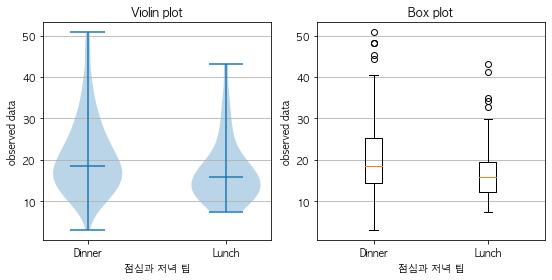

In [8]:
# data load
data3 = pd.read_csv('../data/tips.csv')
print(data3)
DINNER, LUNCH = 'Dinner', 'Lunch'

frame01 = data3.loc[data3['time'] == DINNER, 'total_bill']
frame01.index.name = DINNER

frame02 = data3.loc[data3['time'] == LUNCH, 'total_bill']
frame02.index.name = LUNCH

chartdata = [np.array(frame01), np.array(frame02)]
print('chartdata')
print(chartdata)





fig2, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# plot violin plot
axs[0].violinplot(chartdata,
                  showmeans=False, # 평균값이 가로줄로 들어가지 않게끔
                  showmedians=True) # 중간값이 가로줄로 들어가게끔
axs[0].set_title('Violin plot')

axs[1].boxplot(chartdata) # plot box plot
axs[1].set_title('Box plot')


# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(chartdata))])
    ax.set_xlabel('점심과 저녁 팁')
    ax.set_ylabel('observed data')

# add x-tick labels
plt.setp(axs, xticks=[y + 1 for y in range(len(chartdata))],
         xticklabels=[DINNER, LUNCH])


# plt.show()
FileSave()

In [9]:
from matplotlib.backends.backend_pdf import PdfPages

pdfsave = PdfPages(CHART_NAME + "_19011773.pdf")
pdfsave.savefig(fig1)
pdfsave.savefig(fig2)
pdfsave.close()